In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [2]:
df = pd.read_csv("TASK-ML-INTERN.csv")

# 1. EDA

In [3]:
df.head(2)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0


In [4]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [5]:
print("data shape is:", df.shape)

data shape is: (500, 450)


In [6]:
# Check missing values
print("Number of nulls in the data: ",df.isnull().sum().sum())

Number of nulls in the data:  0


In [7]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

correlation matrix between spectral features and vomitoxin levels

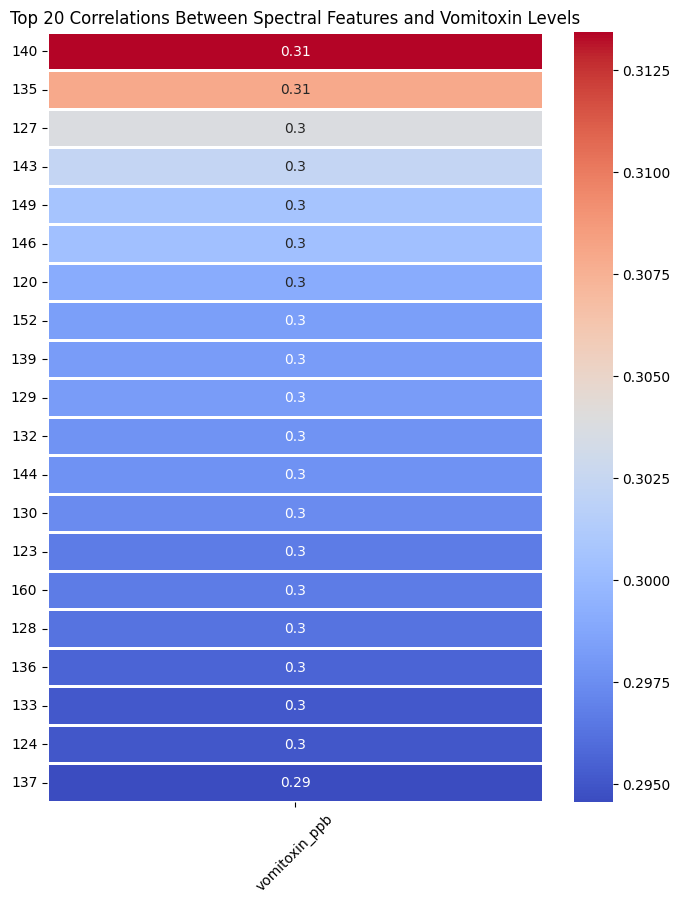

In [8]:
corr = df.iloc[:, 1:].corr()
top_features = corr[['vomitoxin_ppb']].abs().sort_values(by='vomitoxin_ppb', ascending=False)[1:21]

plt.figure(figsize=(8, 10))
sns.heatmap(top_features, cmap="coolwarm", annot=True, linewidths=.9)

plt.title("Top 20 Correlations Between Spectral Features and Vomitoxin Levels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [9]:
print("Statistics for spectral data: ")
df_numeric = df.iloc[:, 1:]
df_numeric.describe()

Statistics for spectral data: 


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


Let's check take a closer look at distribution of vomitoxin

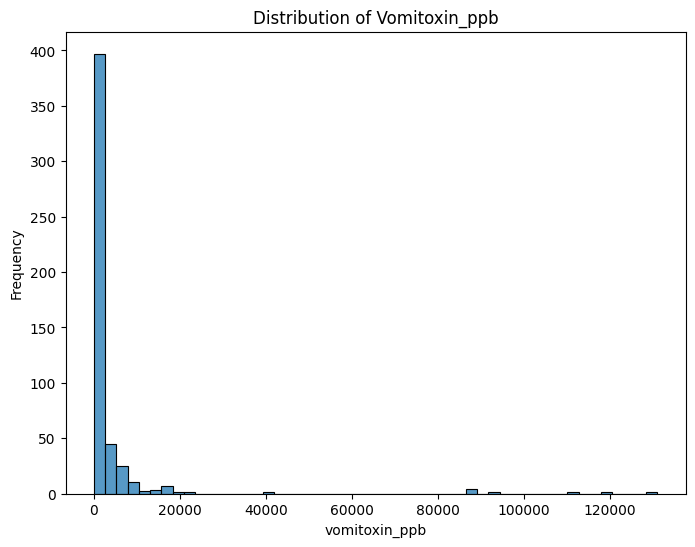

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['vomitoxin_ppb'], bins=50)
plt.title("Distribution of Vomitoxin_ppb")
plt.xlabel("vomitoxin_ppb")
plt.ylabel("Frequency")
plt.show()

## Summary of EDA
**Feature Range:**
* Most spectral features (0-447) have values between ~0.25 and 0.95
* The target value has a very large range: 0 to 131,000.

**STD**
* Most spectral features have a small standard deviation (~0.04 to 0.05).
* The target has an extremely high standard deviation (13,095.8), indicating extreme outliers.

I will standardize the data using Robust Scaling as it is best for skewed data and handling outliers

# 2. Data Preprocessing

In [22]:
from sklearn.preprocessing import RobustScaler

df_numeric = df.iloc[:, 1:]


# Apply robust scaling
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled

ModuleNotFoundError: No module named 'sklearn'